<a href="https://colab.research.google.com/github/alexanderbeleno16/implementacion_gradiente_gbm/blob/main/implementacion_gradiente_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPLEMENTACIÓN**

# **TEMA: GRADIENTE Ó GBM**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, ANDREA ORELLANO, STIVEN MORALES


## **INFORMACIÓN RELACIONADA AL DATASET**


El dataset proporciona información sobre las tarifas y costos de la energía eléctrica ofrecidos por Empresas Públicas de Medellín E.S.P. (EPM) en el mercado regulado. Cubre el periodo de diciembre de 2016 a diciembre de 2021.

## **REFERENCIA DEL DATASET**
https://www.datos.gov.co/Funci-n-p-blica/Tarifas-para-Servicios-de-Energ-a-EPM/sfcd-b3ey/data_preview


## **IMPORTACIÓN DE LIBRERIAS**
En esta sección del código se realizan las importaciones correspondientes a cada librería que permitiran la realización exitosa de la lectura y el tratamiento de los datos del archivo ".csv".

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Normalización
from sklearn.preprocessing import MinMaxScaler

# Pruebas y Entrenamiento
from sklearn.model_selection import train_test_split

# Aplicar Modelo Gradient(GBM)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix



**Pandas (pd):** Para manipulación y análisis de datos, nos ofrece los dataframe.

**NumPy (np):** Para operaciones Matematicas/numéricas.

**Matplotlib.pyplot (plt):** Para crear gráficos/visualizaciones de datos.



**MinMaxScaler:** Para realizar la Normalización.

**train_test_split:** Para realizar las pruebas y Entrenamiento.

**GradientBoostingClassifier, classification_report, confusion_matrix:** Para aplicar el modelo Gradient(GBM).

## **CARGUE Y LECTURA DEL ARCHIVO CSV**
En esta sección del código se carga los datos del archivo CSV en un objeto llamado data_frame

In [191]:
data_frame = pd.read_csv('drive/MyDrive/files/Tarifas_para_Servicios_de_Energia_EPM.csv')

## **Métodos básicos para el análisis de la información**

### **info()**
Proporciona información sobre el DataFrame, incluyendo el número de filas y columnas, los tipos de datos en cada columna y la cantidad de memoria utilizada.

In [192]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tipo de Información    3622 non-null   object 
 1   Tipo de Tarifa         3622 non-null   object 
 2   Tipo de Dato           3622 non-null   object 
 3   Rango de Consumo       1480 non-null   object 
 4   Nivel                  3622 non-null   object 
 5   Propiedad Epm          3621 non-null   float64
 6   Compartido             3621 non-null   float64
 7   Propiedad del Cliente  3621 non-null   float64
 8   Punta                  3621 non-null   float64
 9   Fuera de Punta         3621 non-null   float64
 10  Año                    3621 non-null   float64
 11  Mes                    3621 non-null   object 
dtypes: float64(6), object(6)
memory usage: 339.7+ KB


### **describe()**
Calcula estadísticas descriptivas para cada columna numérica, como media, desviación estándar, mínimo, máximo, etc.

In [193]:
data_frame.describe()

Propiedad Epm     Compartido  Propiedad del Cliente         Punta  \
count    3621.000000    3621.000000            3621.000000   3621.000000   
mean      178.890942     228.680370             165.393888     85.006319   
std       236.586156    3413.972102             218.177223   1029.674587   
min        -1.610000      -1.610000              -1.610000     -1.610000   
25%         0.000000       0.000000               0.000000      0.000000   
50%        35.200000      35.100000              35.200000      0.000000   
75%       426.480000     414.620000             398.880000     39.750000   
max       742.140000  205151.000000             681.960000  43577.000000   

       Fuera de Punta          Año  
count     3621.000000  3621.000000  
mean        71.466929  2018.938415  
std        734.070706     1.458379  
min          0.000000  2016.000000  
25%          0.000000  2018.000000  
50%          0.000000  2019.000000  
75%         36.950000  2020.000000  
max      43577.000000  2021.000000

### **head()**
Muestra las primeras filas del DataFrame, lo que permite una vista previa rápida de los datos.

In [194]:
data_frame.head()

Tipo de Información Tipo de Tarifa Tipo de Dato Rango de Consumo Nivel  \
0             Monomia    Residencial    Estrato 1     Rango 0 - CS     I   
1             Monomia    Residencial    Estrato 1       Rango > CS     I   
2             Monomia    Residencial    Estrato 2     Rango 0 - CS     I   
3             Monomia    Residencial    Estrato 2       Rango > CS     I   
4             Monomia    Residencial    Estrato 3     Rango 0 - CS     I   

   Propiedad Epm  Compartido  Propiedad del Cliente  Punta  Fuera de Punta  \
0         228.08      218.81                 209.54    0.0             0.0   
1         570.20      547.02                 523.85    0.0             0.0   
2         285.10      273.51                 261.92    0.0             0.0   
3         570.20      547.02                 523.85    0.0             0.0   
4         484.67      464.97                 445.27    0.0             0.0   

      Año        Mes  
0  2020.0  Diciembre  
1  2020.0  Diciembre  
2  2020.0  Diciembre  
3  2020.0  Diciembre  
4  2020.0  Diciembre

### **unique()**
Obtiene los valores unicos de una columna en especifico.

In [195]:
data_frame['Mes'].unique()

array(['Diciembre', 'Marzo', 'Enero', 'Mayo', 'Febrero', 'Julio', 'Abril',
       'Noviembre', 'Junio', 'Agosto', 'Septiembre', 'Octubre', nan],
      dtype=object)

## **Gráficos**


### Gráfico de Bigote

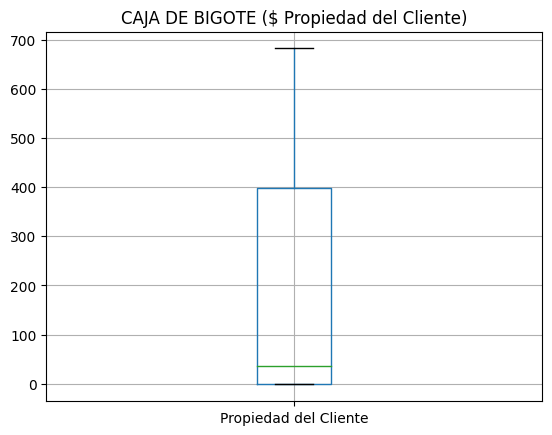

In [196]:
data_frame.boxplot(column='Propiedad del Cliente')
plt.title('CAJA DE BIGOTE ($ Propiedad del Cliente)')
# plt.ylabel('Registros')
plt.show()

Partes del diagrama:

**Caja:** La caja representa el intercuartil (IQR), que abarca el 50% central de los datos.

**Línea media:** La línea media dentro de la caja representa la mediana, que es el valor que divide al conjunto de datos en dos mitades iguales.

**Bigotes:** Los bigotes se extienden desde la caja hasta el máximo y el mínimo de los datos, excluyendo los valores atípicos.

**Valores atípicos:** Los puntos fuera de los bigotes se consideran valores atípicos.

Conclusiones:

- La mayoría de 'Prodiedad del cliente' está entre $200 y $700.
- Hay algunos 'Prodiedad del cliente' significativamente mayor que la mayoría.

### Histograma

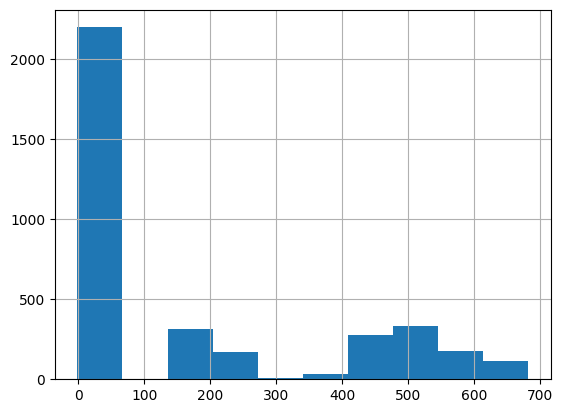

In [197]:
data_frame.loc[:, 'Propiedad del Cliente'].hist(bins=10)
plt.show()

Partes del histograma:

- Eje horizontal: Representa el valor de la propiedad del cliente.
- Eje vertical: Representa la frecuencia de cada valor de la propiedad del cliente.
- Barras: Cada barra representa la frecuencia de un rango de valores de la propiedad del cliente.

Conclusiones:

- La mayoría de 'Prodiedad del cliente' tienen un valor de cero.
- Algunos clientes tienen 'Prodiedad del cliente' menor a $500.

## Valores Faltantes/Nulos
Se obtiene por columna la cantidad de registros con valores nulos

In [198]:
print(data_frame.isnull().sum())

Tipo de Información         0
Tipo de Tarifa              0
Tipo de Dato                0
Rango de Consumo         2142
Nivel                       0
Propiedad Epm               1
Compartido                  1
Propiedad del Cliente       1
Punta                       1
Fuera de Punta              1
Año                         1
Mes                         1
dtype: int64


## Preprocesamiento
Filtrar por cada columna, todos los valores nulos para luego reemplazarlos por la moda de cada columna correspondiente

In [199]:
# Para manejar los valores faltantes, puedes eliminar las filas con valores faltantes
# data_frame_sin_nulos = data_frame.dropna()

# O imputar los valores faltantes con un valor específico, como la media(Promedio) de la columna
# data_frame.fillna(data_frame.mean(), inplace=True)
# data_frame.fillna(data_frame.median(), inplace=True)
data_frame.fillna(data_frame.mode().iloc[0], inplace=True)

print(data_frame.isnull().sum())

Tipo de Información      0
Tipo de Tarifa           0
Tipo de Dato             0
Rango de Consumo         0
Nivel                    0
Propiedad Epm            0
Compartido               0
Propiedad del Cliente    0
Punta                    0
Fuera de Punta           0
Año                      0
Mes                      0
dtype: int64


## Normalización
La normalización es útil cuando las características tienen diferentes escalas y ayuda a tener un impacto mas equitativo en el modelo.

En este ejemplo, primero seleccionamos las columnas numéricas que deseamos normalizar y luego creamos un objeto MinMaxScaler. Luego, aplicamos la normalización solo a esas columnas seleccionadas, utilizando la función fit_transform() del objeto MinMaxScaler.

Esto asegurará que solo las características numéricas se normalicen, y las columnas no numéricas (como 'Tipo de Información', 'Tipo de Tarifa', etc.) permanecerán sin cambios

In [200]:
# Seleccionar solo las columnas numéricas para la normalización
columnas_numericas = ['Propiedad Epm', 'Compartido', 'Propiedad del Cliente', 'Punta', 'Fuera de Punta', 'Año']

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar solo las columnas numéricas
data_frame[columnas_numericas] = scaler.fit_transform(data_frame[columnas_numericas])

## Separación de pruebas y entrenamiento

- X contiene las características del DataFrame data_frame, excluyendo las columnas no numéricas que no se normalizaron.
- y contiene las etiquetas que deseas predecir, en este caso, la columna 'Nivel'.
- Utilizamos la función train_test_split para dividir X e y en conjuntos de entrenamiento y prueba. Especificamos que el 80% de los datos se utilizarán para entrenamiento (train_size=0.8) y el 20% para pruebas (test_size=0.2).
- random_state se establece en un valor específico (en este caso, 42) para garantizar la reproducibilidad de la división.

In [201]:
# Dividir el DataFrame en características (X) y etiquetas (y)
X = data_frame.drop(columns=['Tipo de Información', 'Tipo de Tarifa', 'Tipo de Dato', 'Rango de Consumo', 'Nivel', 'Mes'])
y = data_frame['Nivel']  # Suponiendo que 'Nivel' es la columna de etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: características de entrenamiento
# X_test: características de prueba
# y_train: etiquetas de entrenamiento
# y_test: etiquetas de prueba


## Aplicación del modelo GRADIANT (GBM)

- Importamos GradientBoostingClassifier desde sklearn.ensemble.
- Creamos una instancia del modelo de Gradient Boosting Classifier llamada gbm_model.
- Entrenamos el modelo utilizando el método fit() con los conjuntos de entrenamiento (X_train y y_train).
- Realizamos predicciones sobre los datos de prueba utilizando el método predict() con el conjunto de características de prueba (X_test), y guardamos las predicciones en la variable y_pred.

In [202]:
# Crear el modelo de Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()

# Entrenar el modelo con los datos de entrenamiento
gbm_model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = gbm_model.predict(X_test)


In [203]:
# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       421
          II       0.51      0.45      0.48       104
         III       0.46      0.51      0.48       109
          IV       0.40      0.40      0.40        91

    accuracy                           0.77       725
   macro avg       0.59      0.59      0.59       725
weighted avg       0.77      0.77      0.77       725

[[421   0   0   0]
 [  0  47  33  24]
 [  0  24  56  29]
 [  0  21  34  36]]


## METRICAS

### **Precisión (Precision)**

La precisión se define como la proporción de las predicciones positivas correctas (verdaderos positivos) respecto al total de predicciones positivas (verdaderos positivos más falsos positivos). En otras palabras, la precisión mide la calidad de las predicciones positivas realizadas por el modelo.

- Para la clase "I", la precisión es del 100%. Esto significa que todas las predicciones positivas para la clase "I" fueron correctas.
- Para la clase "II", la precisión es del 51%. Esto indica que aproximadamente la mitad de las predicciones positivas para la clase "II" fueron correctas.
- Para la clase "III", la precisión es del 46%. Esto significa que alrededor del 46% de las predicciones positivas para la clase "III" fueron correctas.
- Para la clase "IV", la precisión es del 40%. Esto indica que aproximadamente el 40% de las predicciones positivas para la clase "IV" fueron correctas.

### Recall (Sensibilidad)
El recall se define como la proporción de las predicciones positivas correctas (verdaderos positivos) respecto al total de casos positivos en los datos de prueba (verdaderos positivos más falsos negativos). En otras palabras, el recall mide la capacidad del modelo para encontrar todos los casos positivos.

- Para la clase "I", el recall es del 100%. Esto significa que el modelo identificó correctamente todos los casos positivos de la clase "I".
- Para la clase "II", el recall es del 45%. Esto indica que el modelo identificó aproximadamente el 45% de los casos positivos de la clase "II".
- Para la clase "III", el recall es del 51%. Esto significa que el modelo identificó aproximadamente el 51% de los casos positivos de la clase "III".
- Para la clase "IV", el recall es del 40%. Esto indica que el modelo identificó aproximadamente el 40% de los casos positivos de la clase "IV".

### F1-Score
El puntaje F1 es la media armónica de precisión y recall. Proporciona un equilibrio entre ambas métricas y es útil cuando hay un desequilibrio entre las clases. Un puntaje F1 alto indica tanto una alta precisión como un alto recall.

### Matriz de Confusión
La matriz de confusión es una tabla que muestra las cantidades de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos para cada clase. Es una herramienta útil para entender dónde el modelo está teniendo problemas en la clasificación.

- La diagonal principal de la matriz de confusión muestra los verdaderos positivos para cada clase.
- Los valores fuera de la diagonal principal representan los falsos positivos (en las columnas) y los falsos negativos (en las filas).
- Por ejemplo, la celda en la fila "II" y la columna "III" indica que hay 33 falsos positivos para la clase "II" que fueron clasificados incorrectamente como clase "III".

## PRUEBA DE PREDECIR Y COMPARAR

En cada línea, se muestran los datos reales y las predicciones correspondientes realizadas por el modelo.

**Datos reales:** Se refiere a las etiquetas reales de los ejemplos seleccionados del conjunto de prueba.

**Predicción:** Se refiere a las etiquetas predichas por el modelo para esos mismos ejemplos.
Por ejemplo:

- En la primera línea, el dato real era de la clase "III", pero el modelo predijo la clase "II".
- En la segunda línea, tanto el dato real como la predicción fueron de la clase "II", lo que indica una predicción correcta.
- En la tercera línea, el dato real era de la clase "IV", pero el modelo predijo la clase "III".


Al observar estas comparaciones entre los datos reales y las predicciones, puedes evaluar la precisión del modelo en estos casos individuales. Una coincidencia entre el dato real y la predicción indica una predicción correcta, mientras que una discrepancia indica un error en la predicción.

In [204]:
# Seleccionar un grupo de datos para predecir
X_prueba = X_test[:25]
y_prueba_real = y_test[:25]

# Realizar predicciones con el modelo
y_prueba_pred = gbm_model.predict(X_prueba)

# Comparar las predicciones con las etiquetas reales
for i in range(len(y_prueba_real)):
    print(f"Datos reales: {y_prueba_real.iloc[i]} - Predicción: {y_prueba_pred[i]}")


Datos reales: III - Predicción: II
Datos reales: II - Predicción: II
Datos reales: IV - Predicción: III
Datos reales: II - Predicción: IV
Datos reales: I - Predicción: I
Datos reales: I - Predicción: I
Datos reales: III - Predicción: IV
Datos reales: IV - Predicción: II
Datos reales: III - Predicción: IV
Datos reales: II - Predicción: III
Datos reales: III - Predicción: III
Datos reales: I - Predicción: I
Datos reales: II - Predicción: III
Datos reales: II - Predicción: III
Datos reales: I - Predicción: I
Datos reales: I - Predicción: I
Datos reales: IV - Predicción: IV
Datos reales: I - Predicción: I
Datos reales: I - Predicción: I
Datos reales: I - Predicción: I
Datos reales: II - Predicción: II
Datos reales: I - Predicción: I
Datos reales: III - Predicción: IV
Datos reales: II - Predicción: III
Datos reales: IV - Predicción: III
